# Data field descriptions from RSNA pneumonia dataset:

- patientId- A patientId. Each patientId corresponds to a unique image.
- x - the upper-left x coordinate of the bounding box.
- y - the upper-left y coordinate of the bounding box.
- width - the width of the bounding box.
- height - the height of the bounding box.
- Target - the binary Target, indicating whether this sample has evidence of pneumonia.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_sample_submission.csv
/kaggle/input/rsna-pneumonia-detection-challenge/GCP Credits Request Link - RSNA.txt
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/1044cdf6-d7b5-4e65-b569-10418f948419.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/1cad996a-c21c-46c8-aa09-95aa8220efa5.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/2fa863e7-65e0-4808-a1c2-5e15b8157470.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/102b3230-f521-48e9-807f-7f219d6778e6.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/1ecf47f9-3905-4518-b171-bc58cdac5e54.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/2ce9bd15-5511-4fc8-865d-d23ab1321bf8.dcm
/kaggle/input/rsna-pn

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/21dfd5ca-35cf-4159-989f-734ba8c37ebb.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/019bf13a-7fd5-417a-8959-ba79e9b9f875.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/22cd53c9-4ab4-4ba2-85b2-8eeb83811ced.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/14e3ed14-3efe-4de9-8c95-46824591482a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/1ef1ca84-8256-475f-9753-a32b5b17245d.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/004b28ac-d188-427b-8a21-10501125f596.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/290132ce-cede-4fcb-82a2-69a106ef9576.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/295a47cb-b808-45ee-9162-7e6e755dd064.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_test_images/2be405ce-d581-4e02-bb92-04c5145697fe.dcm
/kaggle/in

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3e120bed-fc23-42ac-85e6-59a28a1d215a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/e01cee30-c1b4-4034-8a52-bda150e93bd4.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/32652bc7-21e2-4aa4-ae0c-461950e4c131.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3fb227fe-ba26-4682-ae1f-0e19dee31876.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/45e92e87-9e8e-4783-ba97-c032c17864da.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/bb0fbd66-925e-487a-bdb6-9f172febd768.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/e8a6ccf4-845e-4663-b561-008bdf13c7fd.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/09547f4f-c52e-4fd7-8738-0e01e6277034.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a0c12b73-11a4-4ad2-815a-f8a818d39795.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/f295132a-40a6-4e4d-94fb-a5b05f8915d5.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/e54886f4-c110-4606-a543-f628b8cff558.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6f6f2177-304d-4174-ad65-7b163f492c33.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3d070009-c877-4ed4-ac80-53781cb30fef.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/fd0b77b2-0fe2-4104-aea7-280c1f27941f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3c1fdc6b-2e9a-46f7-8dbd-28d4155f9b93.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/71fc294c-5903-4215-be52-06d5cbb877ea.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/0a63a331-3e17-4e23-8a9f-f7a4ec850a1b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/48e79fd1-8194-47f1-9e54-d26af27cb1b0.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/8f2cdbe6-7e29-4c40-ba7f-54d3f64d10e6.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/494e613b-e81b-4ae0-856b-178c0310552b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/57a2e0f6-9345-4aeb-8f49-fab3a86f1c35.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/26a1ecf7-b0ce-43a6-9893-14e8fb0e4704.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/548ee990-ae0c-4307-87f3-f92912c7951c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/4e08a9b6-0670-4944-ad61-8c824920b6e7.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/38b2fb12-5462-498c-b2d6-13262b7e72a8.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d5555a76-3191-4a05-a1d9-3e11f4c8d045.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/18be2116-e8dd-4c42-8c56-8f2672e35bb7.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/0422a993-6daa-43b9-aa54-80104541f539.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/18287dd8-6e84-424c-914d-c549680d1b9f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ace3688f-2479-4468-9759-1e9a1fe02d6f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3211c41c-8ced-42ba-8b0f-a04797f1ff27.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b12e250e-9e7d-474f-8afd-9546a6ef0afd.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b4158c24-1186-4d75-8b45-6c0c378a8ac5.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ed7fe3b0-3398-4fef-98cc-8432c7b71348.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/97824fba-02eb-4767-ae26-6433b954340c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/45800b16-7351-4fbb-a957-ab8d48a157ad.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c6da6f67-a874-4fd3-9726-898bbb502d76.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/8c6db598-84a6-4932-acda-c1889b11f864.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/bc03198b-57f4-47b5-8808-114fd5cb9808.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/89821e35-22be-4f81-9aca-15a5192a5c6d.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/da232efe-5a6e-41d7-adac-27eeb671cb61.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/fade48fa-2d30-4b29-bcbd-3fcbf80a8254.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/bb65756f-f78d-412a-b5e6-c7fe81c9eb4b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/bae3200d-081c-4a6d-a999-ad1f0b09bcea.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b79a9188-b51a-47ba-b993-126bf0799cae.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c42f4515-1bf2-4f63-a815-fa2e5bd45016.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3e9dc5b9-1b7a-4e9f-a8aa-d28fc622f595.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/5191c1d7-b90e-46a1-b5e6-3459f03ece80.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/46d39cb8-d15e-4d00-8c38-63bda0e28a9f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/5d9a3bee-f9c3-4107-b021-f9f99eb55a4a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d00da2d8-d89f-496b-a77b-e5b51b2b79ca.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/bedf2835-76ba-4bd4-8fef-a7c767b7743b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6bfad602-a328-49ea-80cf-bb6db9d42652.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d2250f2c-c283-4b4d-a54b-0e662067a4fc.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6b1c5aa9-639f-46c5-91c9-186952430ee7.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b01c0d6b-11ad-463d-85bc-f4e4f1dfbc8a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/246bf123-5a0d-4a3d-b4b4-6e442f8a830c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/57567fb1-88b3-4733-a50b-561a73146d5a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3e68ba7b-58ae-4415-a4e0-1698e03c4489.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/7ce14110-e577-4b08-8385-95ce1af5cc99.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ea31d2cb-bc85-4b0b-8f7b-bb7ce1cee22d.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/fc76e52c-6302-48b2-8750-2f8584fb704c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/78f9f5cf-ffc4-48a0-8895-bde50f783bfa.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/91096cbe-eb13-497b-9aff-3b4af34dd3fb.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/e90748f4-fa65-4ffc-8459-a2e2b293a8e7.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6f102297-4e9a-4c0f-ae5b-231d982c0bd8.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/49bcf366-c1e3-4185-9626-b70108ec0562.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/4b004c64-d809-4309-9840-bdf38aaed74a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/486c3a4e-e899-44ef-b89e-f5f808177b91.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ff8563d5-cc01-4dce-87c6-bf12e748955c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/2ef52c28-b6f9-4317-b062-e016efc73c5f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/be4fb03a-5028-40b3-8a3c-0508668b446c.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/838d5522-d44f-49a5-a4e2-7e84a75c2f75.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/852156be-0aab-4dc7-95d6-eda950096d0f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/f01f78a7-9c6c-4c55-83f9-e30aa84d3bd5.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ed48d519-5491-4e21-ae6e-2305da76068a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6abf7105-0f64-4d63-bf5d-9fa0084ce621.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/803c7f34-9b41-41b2-8cac-1b78147e3c32.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b6e35e80-7b64-4134-9760-94295ecd4ce3.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/cfe6b27d-3e1a-4498-b087-1c7726ed436f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/32db1348-d6f7-4512-a4ba-49415004d3b0.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/295de041-5711-400a-8241-7d7cf500971e.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/af9d342a-518e-47be-99a3-b2138960db46.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6238f929-a419-4e65-834e-41d0f7dc0b36.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/7c206793-4723-4655-b36f-71486cc0a063.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6bd06739-0335-492e-bce8-e2c3ec1706b2.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c4988ca9-812e-4edc-8e86-8f0cbc81e077.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c5a840e4-200e-40b5-aa77-f3360a82298b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/17db8400-909f-46d9-8d94-bc33309bb0ff.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/44a8fb24-5f75-4e9a-a187-70f3e608fd62.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/6d05e276-4fa2-4959-b2ec-b471c3af2d5b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d8578918-1047-496a-b9f1-36ae4d0e53da.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/eef7f5e9-8a8d-44f6-800c-cf3774b51f0e.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/815db0ba-1be2-4e7e-8e86-b4cabce2b0c7.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ad797c06-afde-425e-b0a5-0d4b5d0f2af8.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/1ed2b1aa-c8e6-4b76-aaeb-289fecd0095b.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/42cb26eb-155c-49a8-90db-52f0548fc691.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/648d7073-547d-4ce2-b91d-87436e5e7abf.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/4a2078dc-3789-43b2-a31e-19014d4fe3eb.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/7e299a8b-364b-4348-bd16-c43ece7c9d12.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ba2d4acc-03d3-4cc9-92f2-2f9a1bb21adb.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c54770fc-d30c-46e3-b3e5-c89dde6000ad.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/0952761e-07c2-441a-bb1b-11bf1b5375c5.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3ebf4e25-fb47-4040-a1f3-236fdad3e0f7.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a62e6942-417d-4a66-b813-ece3decec0bf.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/60fa29d5-a531-4467-a0d3-a4a744316a62.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ed46b092-fc9f-4caa-ab25-21b5a154fd8d.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/d58893fa-b9e9-4d93-a75f-c0b982aff3c1.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/cfc7e223-b50b-4204-973a-6cabce3072a0.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/5e8c5295-6749-4e4a-8f4b-b770140fc529.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/ce4b3358-32c2-4ffc-8bea-3c4bad887322.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a9a0308c-67af-4872-89f6-e9ecb5390ada.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/7b23e4cf-95d2-4b64-9cdc-c19bcd8bef3a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3ea080bf-4e81-4037-a686-fcf254a9e1bb.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/b18b104d-6a96-4402-9e0f-64ca63b4f1ec.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/9e9fe9c5-cdff-4b89-85ca-734f96d7fe48.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/7066078d-0568-4411-b20a-09d0c9a87ffd.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/4e2468e2-a8f0-4243-831b-6b227c913e64.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/66a8feed-14a0-4580-9722-6671068db34d.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/43e9313d-47be-4c69-8b6f-655d6404d7f0.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/c8d488eb-1997-4510-8428-1def35b1231a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/70d2cfb4-2b97-469d-bb21-9b344c414dd4.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/fa171602-fde0-4256-8b12-8d50dba408b9.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/18996e90-1465-414c-b623-de6da68336dc.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/0a825a59-c034-481c-b596-9c7f0bc42c2c.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/828fd0fb-4220-4e6d-a0af-dcb15ef43973.dcm
/

/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3c6afc4b-f292-4064-ae8b-06d3439d1d27.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/8c07c421-a313-4724-b05d-642bf2073901.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/197146c0-dfe6-4938-ab89-5fbef34150fc.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/290ba340-b0c0-44d5-ab13-e0e315504cac.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a4a90296-f230-475f-b396-a828e3a53baf.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/a2ad563b-6e82-4724-9016-e4033be97e4a.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/cb22bd08-db57-4129-9659-9ed843fc143f.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/3331a818-6190-4caa-8e71-1849f68d1557.dcm
/kaggle/input/rsna-pneumonia-detection-challenge/stage_2_train_images/637bea6e-a296-4d83-b68a-7cee48434bdd.dcm
/

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import pydicom
import os
from os import listdir
from os.path import isfile, join
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
bbox_df = pd.read_csv('../input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv')         # CSV of labeled bounding box information
class_df = pd.read_csv('../input/rsna-pneumonia-detection-challenge/stage_2_detailed_class_info.csv') # CSV with extra detailed_class_info

In [5]:
print('Number of bounding box labels:', len(bbox_df))
print('Number of classes:', len(class_df))

Number of bounding box labels: 30227
Number of classes: 30227


In [6]:
bbox_df.head()

patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [7]:
bbox_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [8]:
class_df.head()

patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity

In [9]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patientId  30227 non-null  object
 1   class      30227 non-null  object
dtypes: object(2)
memory usage: 472.4+ KB


In [10]:
print("Bounding Box Shape:", bbox_df.shape)
print("Class info Shape:", class_df.shape)

Bounding Box Shape: (30227, 6)
Class info Shape: (30227, 2)


In [29]:
bbox_df.describe(include='all').transpose()

count unique                                   top freq      mean  \
patientId  30227  26684  0ab261f9-4eb5-42ab-a9a5-e918904d6356    4       NaN   
x           9555    NaN                                   NaN  NaN   394.048   
y           9555    NaN                                   NaN  NaN    366.84   
width       9555    NaN                                   NaN  NaN   218.471   
height      9555    NaN                                   NaN  NaN    329.27   
Target     30227    NaN                                   NaN  NaN  0.316108   

                std  min  25%  50%    75%  max  
patientId       NaN  NaN  NaN  NaN    NaN  NaN  
x           204.574    2  207  324    594  835  
y            148.94    2  249  365  478.5  881  
width       59.2895   40  177  217    259  528  
height      157.751   45  203  298    438  942  
Target     0.464963    0    0    0      1    1

In [30]:
class_df.describe(include='all').transpose()

count unique                                   top   freq
patientId  30227  26684  0ab261f9-4eb5-42ab-a9a5-e918904d6356      4
class      30227      3          No Lung Opacity / Not Normal  11821

In [15]:
print(round((8964 / (8964 + 20025)) * 100, 2), '% of the examples are positive')
pd.DataFrame(bbox_df.groupby('Target')['patientId'].count())

30.92 % of the examples are positive


patientId
Target           
0           20672
1            9555

In [18]:
data = class_df.merge(bbox_df, on = 'patientId', how = 'left')
data

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
37624  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
37625  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37626  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37627  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37628  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

           x      y  width  height  Target  
0        NaN    NaN    NaN     NaN       0  
1        NaN    NaN    NaN     NaN       0  
2        NaN    NaN    NaN     NaN       0  
3        NaN    NaN    NaN     NaN       0  
4      264.0  152.0  213.0   379.0       1  
...      ...    ...    ...     ...     ...  
37624    NaN    NaN    NaN     NaN       0  
37625  570.0  393.0  261.0   345.0       1  
37626  233.0  424.0  201.0   356.0       1  
37627  570.0  393.0  261.0   345.0       1  
37628  233.0  424.0  201.0   356.0       1  

[37629 rows x 7 columns]

In [79]:
data.describe(include='all').transpose() # show numerical and string data

count unique                                   top   freq  \
patientId  37629  26684  0ab261f9-4eb5-42ab-a9a5-e918904d6356     16   
class      37629      3                          Lung Opacity  16957   
x          37629    NaN                                   NaN    NaN   
y          37629    NaN                                   NaN    NaN   
width      37629    NaN                                   NaN    NaN   
height     37629    NaN                                   NaN    NaN   
Target     37629    NaN                                   NaN    NaN   

               mean       std  min  25%  50%  75%  max  
patientId       NaN       NaN  NaN  NaN  NaN  NaN  NaN  
class           NaN       NaN  NaN  NaN  NaN  NaN  NaN  
x           368.227   140.318    2  343  343  343  835  
y           357.453   100.194    2  355  355  355  881  
width       218.571   39.7418   40  218  218  218  528  
height      321.978   107.683   45  309  309  309  942  
Target     0.450636  0.497564    0    0    0    1    1


# Inspect Missing Data

We've defined a function below to inspect the missing data.

data.isnull() return False (0) if a cell is non-empty or True (1) when a cell is null (or NaN).

data.isnull().sum() then counts the number of null rows in every column of data

data.index returns the index of row labels that can quickly be counted to specify number of rows using len(data.index)

pd.concat concatenates pandas Series (a column of pandas data) along an axis and appends appropriate labels.

In [19]:
def missing_data(data):
  null_data = data.isnull().sum()
  num_rows = len(data.index)
  percent_null = 100.*null_data/num_rows
  return pd.concat([null_data, percent_null.round(1)], axis=1, keys=['Missing', 'PercentMissing'])

missing_data(data)

Missing  PercentMissing
patientId        0             0.0
class            0             0.0
x            20672            54.9
y            20672            54.9
width        20672            54.9
height       20672            54.9
Target           0             0.0

In [35]:
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values'])

Number of missing values
patientId                         0
class                             0
x                             20672
y                             20672
width                         20672
height                        20672
Target                            0

In [36]:
data.isnull().sum().sum() # Total number of recognised missing values in the entire dataframe

82688

In [43]:
# fill missing values with median column values
data.fillna(data.median(), inplace=True)

In [44]:
pd.DataFrame( data.isnull().sum(), columns= ['Number of missing values'])

Number of missing values
patientId                         0
class                             0
x                                 0
y                                 0
width                             0
height                            0
Target                            0

In [60]:
data[data.Target == 0] #This selects all rows of data with Target==0

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
8      00569f44-917d-4c86-a842-81832af98c30  No Lung Opacity / Not Normal   
...                                     ...                           ...   
37612  c1cf3255-d734-4980-bfe0-967902ad7ed9                        Normal   
37613  c1e228e4-b7b4-432b-a735-36c48fdb806f  No Lung Opacity / Not Normal   
37614  c1e3eb82-c55a-471f-a57f-fe1a823469da                        Normal   
37623  c1edf42b-5958-47ff-a1e7-4f23d99583ba                        Normal   
37624  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   

           x      y  width  height  Target  
0      343.0  355.0  218.0   309.0       0  
1      343.0  355.0  218.0   309.0       0  
2      343.0  355.0  218.0   309.0       0  
3      343.0  355.0  218.0   309.0       0  
8      343.0  355.0  218.0   309.0       0  
...      ...    ...    ...     ...     ...  
37612  343.0  355.0  218.0   309.0       0  
37613  343.0  355.0  218.0   309.0       0  
37614  343.0  355.0  218.0   309.0       0  
37623  343.0  355.0  218.0   309.0       0  
37624  343.0  355.0  218.0   309.0       0  

[20672 rows x 7 columns]

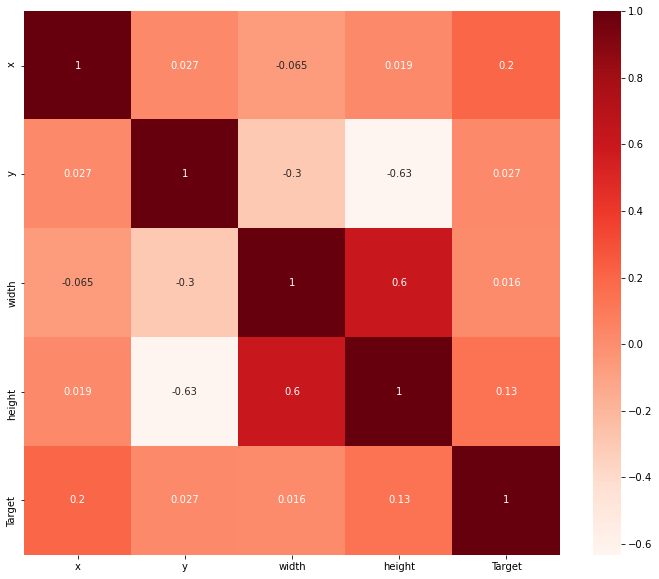

In [52]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

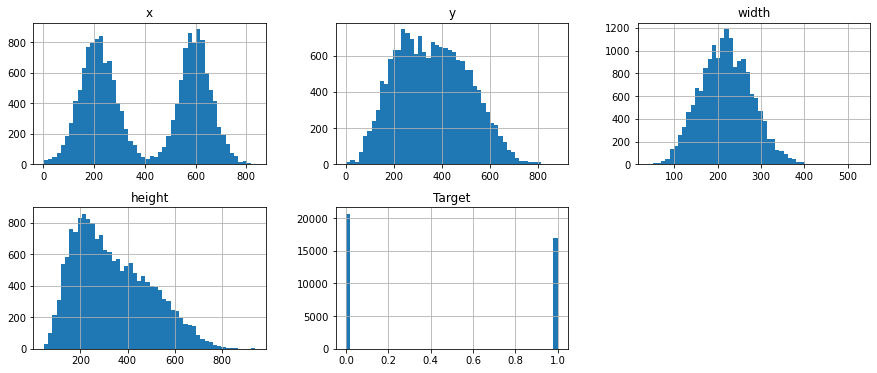

In [20]:
hist = data.hist(bins=50, layout=(2,3), figsize=(15,6))

In [31]:
print("Target 0")
print("="*20)
print(data[data.Target == 0].count())
print("")
print("Target 1")
print("="*20)
print(data[data.Target == 1].count())

Target 0
patientId    20672
class        20672
x                0
y                0
width            0
height           0
Target       20672
dtype: int64

Target 1
patientId    16957
class        16957
x            16957
y            16957
width        16957
height       16957
Target       16957
dtype: int64


In [49]:
data.median()

x         343.0
y         355.0
width     218.0
height    309.0
Target      0.0
dtype: float64

In [32]:
data['class'].value_counts()

Lung Opacity                    16957
No Lung Opacity / Not Normal    11821
Normal                           8851
Name: class, dtype: int64

In [57]:
data['class'].value_counts()*(100.0)/len(data.index)

Lung Opacity                    45.063648
No Lung Opacity / Not Normal    31.414600
Normal                          23.521752
Name: class, dtype: float64

In [61]:
data[data.Target==1].describe(include='all').transpose()

count unique                                   top   freq     mean  \
patientId  16957   6012  0d5bc737-03de-4bb8-98a1-45b7180c3e0f     16      NaN   
class      16957      1                          Lung Opacity  16957      NaN   
x          16957    NaN                                   NaN    NaN   398.98   
y          16957    NaN                                   NaN    NaN  360.443   
width      16957    NaN                                   NaN    NaN  219.267   
height     16957    NaN                                   NaN    NaN    337.8   
Target     16957    NaN                                   NaN    NaN        1   

               std  min  25%  50%  75%  max  
patientId      NaN  NaN  NaN  NaN  NaN  NaN  
class          NaN  NaN  NaN  NaN  NaN  NaN  
x          204.869    2  209  343  596  835  
y          149.202    2  243  355  472  881  
width      59.1953   40  178  218  259  528  
height     158.987   45  210  309  452  942  
Target           0    1    1    1    1    1

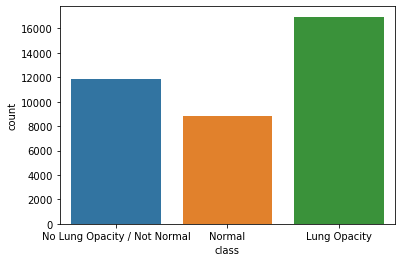

In [62]:
countplot = sns.countplot(data['class'])

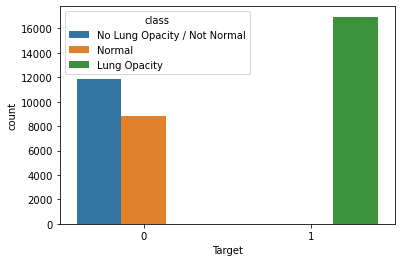

In [63]:
target_class_plot = sns.countplot(data=data, x='Target', hue='class')

# Plotting density of values when Target = 1
We can observe general distributions of the x, y, width, height, data fields in a distplot. We first plot the x-axis value by the data column we're interested in. We specify kde=true to fit a gaussian kernel density estimate on top of the existing data. We specify 50 bins to spread our data over. We specify color for plot colorization. We use matplotlib to generate a plot with four subplots in a 2x2 grid and put each plot in a specific one of its subplots before showing.

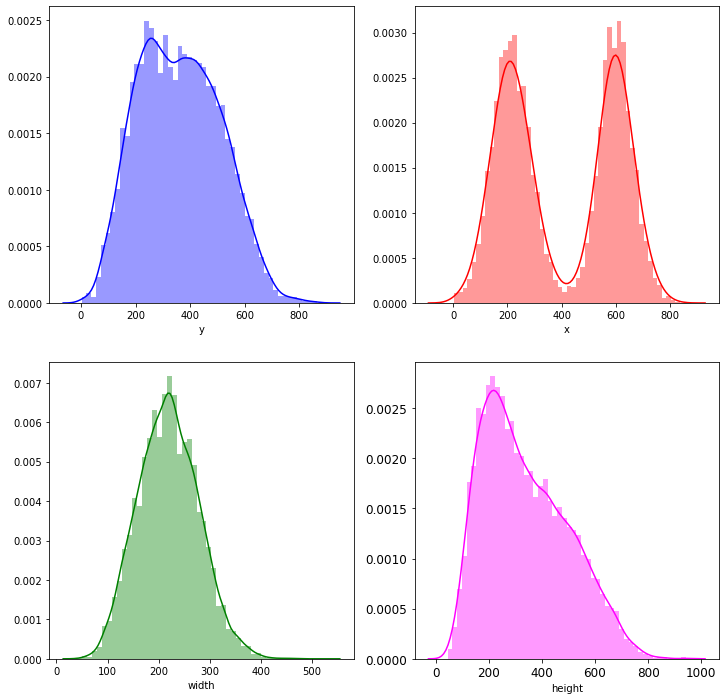

In [64]:
target1_data = data[data['Target']==1]

fig, ax = plt.subplots(2,2, figsize=(12,12))
sns.distplot(target1_data['x'],     kde=True, bins=50, color="red",     ax=ax[0,1])
sns.distplot(target1_data['y'],     kde=True, bins=50, color="blue",    ax=ax[0,0])
sns.distplot(target1_data['width'], kde=True, bins=50, color="green",   ax=ax[1,0])
sns.distplot(target1_data['height'],kde=True, bins=50, color="magenta", ax=ax[1,1])
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [65]:
target1_data['xc'] = target1_data['x'] + target1_data['width']/2
target1_data['yc'] = target1_data['y'] + target1_data['height']/2
target1_data.head()

patientId         class      x      y  width  \
4   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  264.0  152.0  213.0   
5   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  562.0  152.0  256.0   
6   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  264.0  152.0  213.0   
7   00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  562.0  152.0  256.0   
10  00704310-78a8-4b38-8475-49f4573b2dbb  Lung Opacity  323.0  577.0  160.0   

    height  Target     xc     yc  
4    379.0       1  370.5  341.5  
5    453.0       1  690.0  378.5  
6    379.0       1  370.5  341.5  
7    453.0       1  690.0  378.5  
10   104.0       1  403.0  629.0

We specify the x-center label xc and the y-center label yc. We specify the range of values for the x and y axis via xlim and ylim respectively. We specify a blending value of 0.5 (0 transparent - 1 opaque)

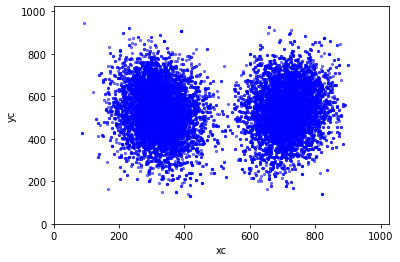

In [67]:
scatter_plot = target1_data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0, 1024), alpha=0.5, marker='.', color='blue')

In [70]:
from os import listdir
from os.path import isfile, join
train_images_dir = '../input/rsna-pneumonia-detection-challenge/stage_2_train_images/'
train_images = [f for f in listdir(train_images_dir) if isfile(join(train_images_dir, f))]
test_images_dir ='../input/rsna-pneumonia-detection-challenge/stage_2_test_images/'
test_images = [f for f in listdir(test_images_dir) if isfile(join(test_images_dir, f))] 
print('5 Training images', train_images[:5]) # Print the first 5

5 Training images ['3e120bed-fc23-42ac-85e6-59a28a1d215a.dcm', 'e01cee30-c1b4-4034-8a52-bda150e93bd4.dcm', '32652bc7-21e2-4aa4-ae0c-461950e4c131.dcm', '3fb227fe-ba26-4682-ae1f-0e19dee31876.dcm', '45e92e87-9e8e-4783-ba97-c032c17864da.dcm']


In [71]:
print('Number of train images:', len(train_images))
print('Number of test images:', len(test_images))

Number of train images: 26684
Number of test images: 3000


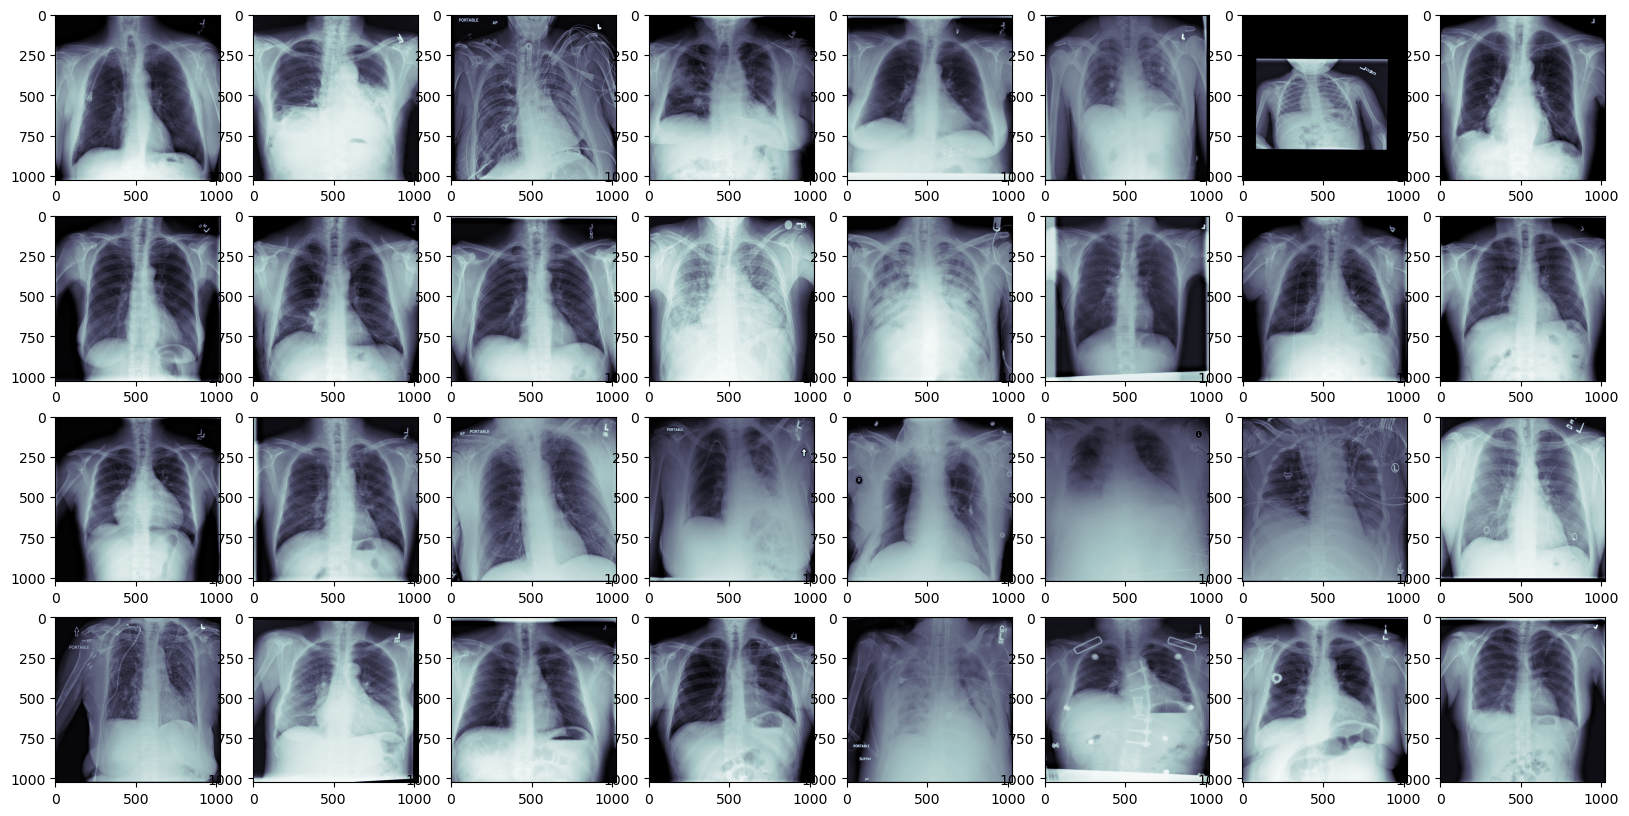

In [72]:
plt.style.use('default')
fig=plt.figure(figsize=(20, 10))
columns = 8; rows = 4
for i in range(1, columns*rows +1):
    ds = pydicom.dcmread(train_images_dir + train_images[i])
    fig.add_subplot(rows, columns, i)
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    fig.add_subplot

# Create dataFrame with names of Images and patientId

First, let's convert this python list into a 1 column pandas dataframe.

Then we add a second column based on truncating the last 4 characters (.dcm) off each string to get the patientId corresponding to each image.

In [73]:
images_df = pd.DataFrame(train_images, columns=['file_name'])
images_df['patientId'] = images_df['file_name'].str[:-4] # add a with patientId column taken from file name
images_df

file_name  \
0      3e120bed-fc23-42ac-85e6-59a28a1d215a.dcm   
1      e01cee30-c1b4-4034-8a52-bda150e93bd4.dcm   
2      32652bc7-21e2-4aa4-ae0c-461950e4c131.dcm   
3      3fb227fe-ba26-4682-ae1f-0e19dee31876.dcm   
4      45e92e87-9e8e-4783-ba97-c032c17864da.dcm   
...                                         ...   
26679  c9c976bf-b105-4b7d-ba23-e2922186c95f.dcm   
26680  5333966d-cb93-4e51-b882-ee5502cf6486.dcm   
26681  5f023b2a-6375-4193-96d3-c8b69e19689f.dcm   
26682  24ef2877-64ae-4c8a-acb5-6e1c302dc7d2.dcm   
26683  e1d5a233-39ca-41dc-a289-b07c3e78cdb1.dcm   

                                  patientId  
0      3e120bed-fc23-42ac-85e6-59a28a1d215a  
1      e01cee30-c1b4-4034-8a52-bda150e93bd4  
2      32652bc7-21e2-4aa4-ae0c-461950e4c131  
3      3fb227fe-ba26-4682-ae1f-0e19dee31876  
4      45e92e87-9e8e-4783-ba97-c032c17864da  
...                                     ...  
26679  c9c976bf-b105-4b7d-ba23-e2922186c95f  
26680  5333966d-cb93-4e51-b882-ee5502cf6486  
26681  5f023b2a-6375-4193-96d3-c8b69e19689f  
26682  24ef2877-64ae-4c8a-acb5-6e1c302dc7d2  
26683  e1d5a233-39ca-41dc-a289-b07c3e78cdb1  

[26684 rows x 2 columns]

In [75]:
# Create merged_df by merging the newly created dataframe (with image names and patientId)
merged_df = data.merge(images_df, on='patientId', how='left')
merged_df

patientId                         class  \
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal   
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal   
2      00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal   
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal   
4      00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity   
...                                     ...                           ...   
37624  c1f6b555-2eb1-4231-98f6-50a963976431                        Normal   
37625  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37626  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37627  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   
37628  c1f7889a-9ea9-4acb-b64c-b737c929599a                  Lung Opacity   

           x      y  width  height  Target  \
0      343.0  355.0  218.0   309.0       0   
1      343.0  355.0  218.0   309.0       0   
2      343.0  355.0  218.0   309.0       0   
3      343.0  355.0  218.0   309.0       0   
4      264.0  152.0  213.0   379.0       1   
...      ...    ...    ...     ...     ...   
37624  343.0  355.0  218.0   309.0       0   
37625  570.0  393.0  261.0   345.0       1   
37626  233.0  424.0  201.0   356.0       1   
37627  570.0  393.0  261.0   345.0       1   
37628  233.0  424.0  201.0   356.0       1   

                                      file_name  
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm  
1      00313ee0-9eaa-42f4-b0ab-c148ed3241cd.dcm  
2      00322d4d-1c29-4943-afc9-b6754be640eb.dcm  
3      003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm  
4      00436515-870c-4b36-a041-de91049b9ab4.dcm  
...                                         ...  
37624  c1f6b555-2eb1-4231-98f6-50a963976431.dcm  
37625  c1f7889a-9ea9-4acb-b64c-b737c929599a.dcm  
37626  c1f7889a-9ea9-4acb-b64c-b737c929599a.dcm  
37627  c1f7889a-9ea9-4acb-b64c-b737c929599a.dcm  
37628  c1f7889a-9ea9-4acb-b64c-b737c929599a.dcm  

[37629 rows x 8 columns]

In [76]:
print("Unique patientId in merged_df: ", merged_df['patientId'].nunique())

Unique patientId in merged_df:  26684


In [77]:
grouped_by_patient = merged_df.groupby(['patientId'])
grouped_by_patient.count() # shows how many times is present per value of 'patientId'

class  x  y  width  height  Target  \
patientId                                                                  
0004cfab-14fd-4e49-80ba-63a80b6bddd6      1  1  1      1       1       1   
000924cf-0f8d-42bd-9158-1af53881a557      1  1  1      1       1       1   
000db696-cf54-4385-b10b-6b16fbb3f985      4  4  4      4       4       4   
000fe35a-2649-43d4-b027-e67796d412e0      4  4  4      4       4       4   
001031d9-f904-4a23-b3e5-2c088acd19c6      4  4  4      4       4       4   
...                                     ... .. ..    ...     ...     ...   
fffb2395-8edd-4954-8a89-ffe2fd329be3      4  4  4      4       4       4   
fffba05a-1635-4545-9bbd-57ad4cfe8d27      1  1  1      1       1       1   
fffc95b5-605b-4226-80ab-62caec682b22      1  1  1      1       1       1   
fffcff11-d018-4414-971a-a7cefa327795      1  1  1      1       1       1   
fffec09e-8a4a-48b1-b33e-ab4890ccd136      1  1  1      1       1       1   

                                      file_name  
patientId                                        
0004cfab-14fd-4e49-80ba-63a80b6bddd6          1  
000924cf-0f8d-42bd-9158-1af53881a557          1  
000db696-cf54-4385-b10b-6b16fbb3f985          4  
000fe35a-2649-43d4-b027-e67796d412e0          4  
001031d9-f904-4a23-b3e5-2c088acd19c6          4  
...                                         ...  
fffb2395-8edd-4954-8a89-ffe2fd329be3          4  
fffba05a-1635-4545-9bbd-57ad4cfe8d27          1  
fffc95b5-605b-4226-80ab-62caec682b22          1  
fffcff11-d018-4414-971a-a7cefa327795          1  
fffec09e-8a4a-48b1-b33e-ab4890ccd136          1  

[26684 rows x 7 columns]

In [78]:
num_rows_df = grouped_by_patient['patientId'].count().to_frame('numRows').reset_index()
num_rows_df

patientId  numRows
0      0004cfab-14fd-4e49-80ba-63a80b6bddd6        1
1      000924cf-0f8d-42bd-9158-1af53881a557        1
2      000db696-cf54-4385-b10b-6b16fbb3f985        4
3      000fe35a-2649-43d4-b027-e67796d412e0        4
4      001031d9-f904-4a23-b3e5-2c088acd19c6        4
...                                     ...      ...
26679  fffb2395-8edd-4954-8a89-ffe2fd329be3        4
26680  fffba05a-1635-4545-9bbd-57ad4cfe8d27        1
26681  fffc95b5-605b-4226-80ab-62caec682b22        1
26682  fffcff11-d018-4414-971a-a7cefa327795        1
26683  fffec09e-8a4a-48b1-b33e-ab4890ccd136        1

[26684 rows x 2 columns]